In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

test_df=pd.read_csv('test.csv')
train_df=pd.read_csv('train.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
combine=pd.concat([test_df, train_df])

(combine.columns.values)

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'], dtype=object)

In [4]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [5]:
train_df.describe(percentiles=[.61,.62,.68,.69,.75,.8,.9,.99])

# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
61%,543.900000,0.000000,3.000000,32.000000,0.000000,0.000000,23.225000
62%,552.800000,1.000000,3.000000,32.000000,0.000000,0.000000,24.150000
68%,606.200000,1.000000,3.000000,35.000000,0.000000,0.000000,26.307500
69%,615.100000,1.000000,3.000000,35.000000,1.000000,0.000000,26.550000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000


In [6]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
train_df[["Sex","Survived"]].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


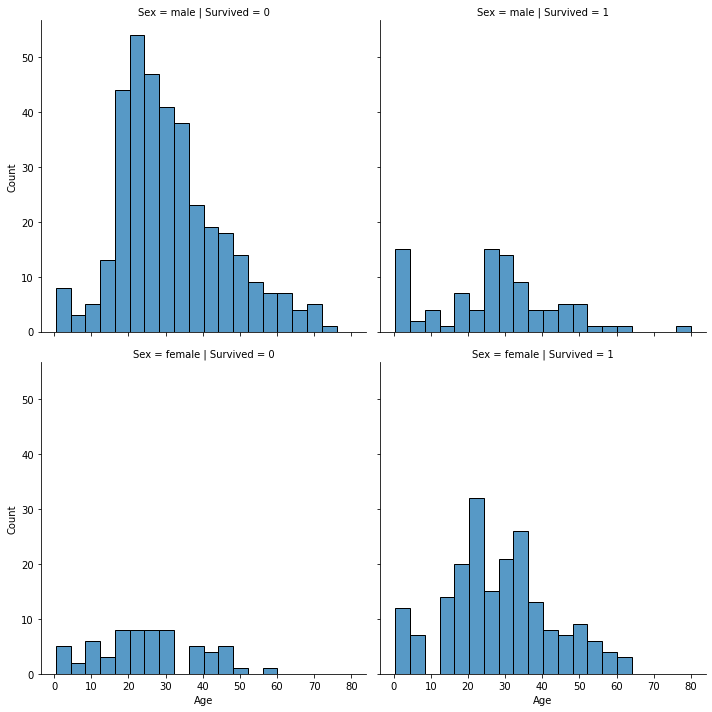

In [8]:
sns.displot(train_df, x="Age",row="Sex", col="Survived")

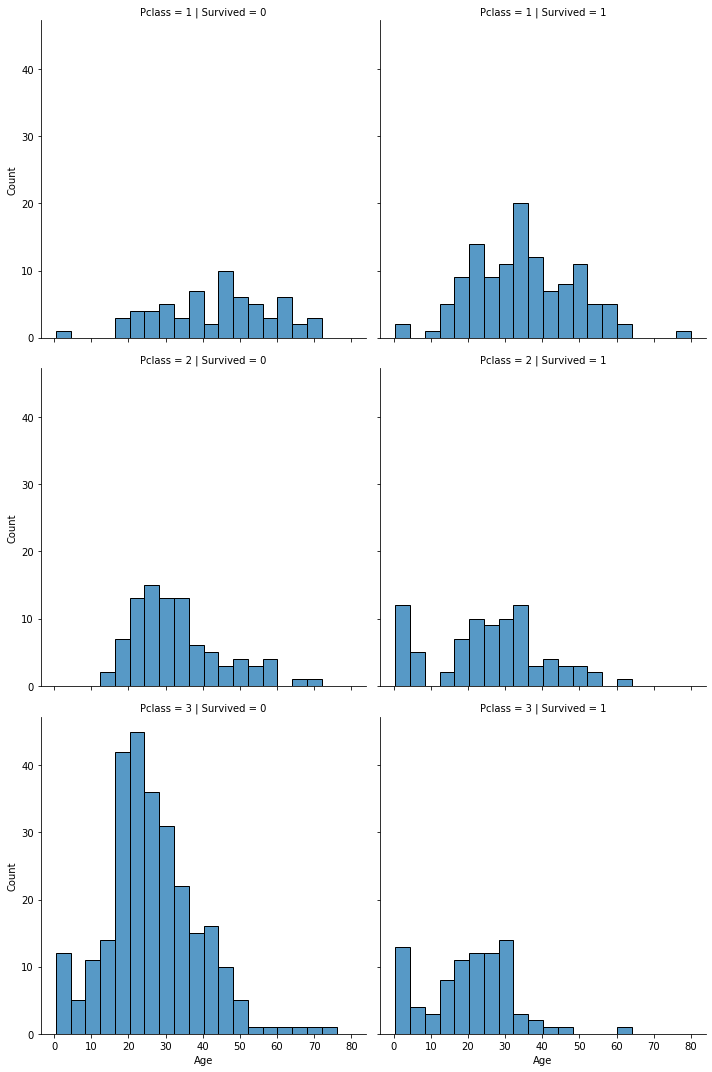

In [9]:
sns.displot(train_df, x="Age", row="Pclass", col="Survived")

In [10]:
# train_df['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)[.]', expand=False)

def title_ext(x):
    return re.findall('\w+[.]',x)[0]

train_df['Title']=train_df['Name'].apply(lambda x: title_ext(x))

train_df[['Title','Sex']].groupby

# train_df.head()


<bound method DataFrame.groupby of      Title     Sex
0      Mr.    male
1     Mrs.  female
2    Miss.  female
3     Mrs.  female
4      Mr.    male
..     ...     ...
886   Rev.    male
887  Miss.  female
888  Miss.  female
889    Mr.    male
890    Mr.    male

[891 rows x 2 columns]>

In [11]:
pd.pivot_table(train_df,index=['Title'], columns=['Sex'], values=['PassengerId'],aggfunc='count')

PassengerId       
Sex            female   male
Title                       
Capt.             NaN    1.0
Col.              NaN    2.0
Countess.         1.0    NaN
Don.              NaN    1.0
Dr.               1.0    6.0
Jonkheer.         NaN    1.0
Lady.             1.0    NaN
Major.            NaN    2.0
Master.           NaN   40.0
Miss.           182.0    NaN
Mlle.             2.0    NaN
Mme.              1.0    NaN
Mr.               NaN  517.0
Mrs.            125.0    NaN
Ms.               1.0    NaN
Rev.              NaN    6.0
Sir.              NaN    1.0

In [12]:
train_df['Sex']=train_df['Sex'].map({'female':1,'male':0}).astype(int)

In [13]:
train_df['Sex'].value_counts()
# describe(include=['O'])

0    577
1    314
Name: Sex, dtype: int64

In [14]:
train_df['Age_bin']=pd.qcut(train_df['Age'], q=5)
train_df['Age_bin'].value_counts().sort_index()


(0.419, 19.0]    164
(19.0, 25.0]     137
(25.0, 31.8]     127
(31.8, 41.0]     144
(41.0, 80.0]     142
Name: Age_bin, dtype: int64

In [15]:
train_df['Fare_bin']=pd.cut(train_df['Fare'], bins=[-np.inf,0,5,10,15,20,25,30,35,np.inf])
aa=train_df['Fare_bin'].value_counts().sort_index()
aa

(-inf, 0.0]      15
(0.0, 5.0]        2
(5.0, 10.0]     319
(10.0, 15.0]    122
(15.0, 20.0]     57
(20.0, 25.0]     42
(25.0, 30.0]    100
(30.0, 35.0]     36
(35.0, inf]     198
Name: Fare_bin, dtype: int64

<AxesSubplot:xlabel='Fare_bin', ylabel='Age'>

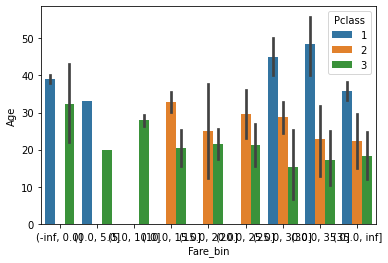

In [16]:
sns.barplot(data=train_df, x='Fare_bin', y='Age', hue='Pclass')

In [17]:
combine=pd.concat([train_df,test_df], keys=['train','test'])
combine.reset_index()
combine

PassengerId  Survived  Pclass  \
train 0              1       0.0       3   
      1              2       1.0       1   
      2              3       1.0       3   
      3              4       1.0       1   
      4              5       0.0       3   
...                ...       ...     ...   
test  413         1305       NaN       3   
      414         1306       NaN       1   
      415         1307       NaN       3   
      416         1308       NaN       3   
      417         1309       NaN       3   

                                                        Name     Sex   Age  \
train 0                              Braund, Mr. Owen Harris       0  22.0   
      1    Cumings, Mrs. John Bradley (Florence Briggs Th...       1  38.0   
      2                               Heikkinen, Miss. Laina       1  26.0   
      3         Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  35.0   
      4                             Allen, Mr. William Henry       0  35.0   
...                                                      ...     ...   ...   
test  413                                 Spector, Mr. Woolf    male   NaN   
      414                       Oliva y Ocana, Dona. Fermina  female  39.0   
      415                       Saether, Mr. Simon Sivertsen    male  38.5   
      416                                Ware, Mr. Frederick    male   NaN   
      417                           Peter, Master. Michael J    male   NaN   

           SibSp  Parch              Ticket      Fare Cabin Embarked  Title  \
train 0        1      0           A/5 21171    7.2500   NaN        S    Mr.   
      1        1      0            PC 17599   71.2833   C85        C   Mrs.   
      2        0      0    STON/O2. 3101282    7.9250   NaN        S  Miss.   
      3        1      0              113803   53.1000  C123        S   Mrs.   
      4        0      0              373450    8.0500   NaN        S    Mr.   
...          ...    ...                 ...       ...   ...      ...    ...   
test  413      0      0           A.5. 3236    8.0500   NaN        S    NaN   
      414      0      0            PC 17758  108.9000  C105        C    NaN   
      415      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S    NaN   
      416      0      0              359309    8.0500   NaN        S    NaN   
      417      1      1                2668   22.3583   NaN        C    NaN   

                Age_bin     Fare_bin  
train 0    (19.0, 25.0]  (5.0, 10.0]  
      1    (31.8, 41.0]  (35.0, inf]  
      2    (25.0, 31.8]  (5.0, 10.0]  
      3    (31.8, 41.0]  (35.0, inf]  
      4    (31.8, 41.0]  (5.0, 10.0]  
...                 ...          ...  
test  413           NaN          NaN  
      414           NaN          NaN  
      415           NaN          NaN  
      416           NaN          NaN  
      417           NaN          NaN  

[1309 rows x 15 columns]

In [18]:
print(combine.shape,"Train Dataset size is ",train_df.shape, "/nTest dataset size is ",test_df.shape)

(1309, 15) Train Dataset size is  (891, 15) /nTest dataset size is  (418, 11)


In [19]:
891+418

1309

In [20]:
combine.head()

PassengerId  Survived  Pclass  \
train 0            1       0.0       3   
      1            2       1.0       1   
      2            3       1.0       3   
      3            4       1.0       1   
      4            5       0.0       3   

                                                      Name Sex   Age  SibSp  \
train 0                            Braund, Mr. Owen Harris   0  22.0      1   
      1  Cumings, Mrs. John Bradley (Florence Briggs Th...   1  38.0      1   
      2                             Heikkinen, Miss. Laina   1  26.0      0   
      3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   1  35.0      1   
      4                           Allen, Mr. William Henry   0  35.0      0   

         Parch            Ticket     Fare Cabin Embarked  Title       Age_bin  \
train 0      0         A/5 21171   7.2500   NaN        S    Mr.  (19.0, 25.0]   
      1      0          PC 17599  71.2833   C85        C   Mrs.  (31.8, 41.0]   
      2      0  STON/O2. 3101282   7.9250   NaN        S  Miss.  (25.0, 31.8]   
      3      0            113803  53.1000  C123        S   Mrs.  (31.8, 41.0]   
      4      0            373450   8.0500   NaN        S    Mr.  (31.8, 41.0]   

            Fare_bin  
train 0  (5.0, 10.0]  
      1  (35.0, inf]  
      2  (5.0, 10.0]  
      3  (35.0, inf]  
      4  (5.0, 10.0]

In [21]:
def title_extr(x):
    return re.findall('\w+[.]',x)[0]


combine['Title_extr']=combine['Name'].apply(lambda x: title_extr(x))

combine['Title_extr'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
Countess.      1
Jonkheer.      1
Dona.          1
Name: Title_extr, dtype: int64

In [22]:
combine2=combine.apply(lambda x:x[0])

combine.reset_index()

,level_0,level_1,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_bin,Fare_bin,Title_extr
0,train,0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,"(19.0, 25.0]","(5.0, 10.0]",Mr.
1,train,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,"(31.8, 41.0]","(35.0, inf]",Mrs.
2,train,2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,"(25.0, 31.8]","(5.0, 10.0]",Miss.
3,train,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs.,"(31.8, 41.0]","(35.0, inf]",Mrs.
4,train,4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr.,"(31.8, 41.0]","(5.0, 10.0]",Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,test,413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN,NaN,NaN,Mr.
1305,test,414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN,NaN,NaN,Dona.
1306,test,415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN,NaN,NaN,Mr.
1307,test,416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN,NaN,NaN,Mr.


In [23]:
combine2.head()

PassengerId                          1
Survived                           0.0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                                  0
dtype: object

In [24]:
combine['Age_bin']=pd.cut(combine['Age'], bins=[-np.inf,0,1,5,10,20,30,40,50,np.inf])

In [25]:
combine['Age_bin'].value_counts().sort_index()

(-inf, 0.0]       0
(0.0, 1.0]       22
(1.0, 5.0]       34
(5.0, 10.0]      30
(10.0, 20.0]    162
(20.0, 30.0]    361
(30.0, 40.0]    210
(40.0, 50.0]    132
(50.0, inf]      95
Name: Age_bin, dtype: int64

In [26]:
are=combine['Age'].median()

combine['Age'].describe(percentiles=[.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.98,.99])

combine.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1309 entries, ('train', 0) to ('test', 417)
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    float64 
 2   Pclass       1309 non-null   int64   
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   object  
 5   Age          1046 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1308 non-null   float64 
 10  Cabin        295 non-null    object  
 11  Embarked     1307 non-null   object  
 12  Title        891 non-null    object  
 13  Age_bin      1046 non-null   category
 14  Fare_bin     891 non-null    category
 15  Title_extr   1309 non-null   object  
dtypes: category(2), float64(3), int64(4), object(7)
memory usage: 189.7+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


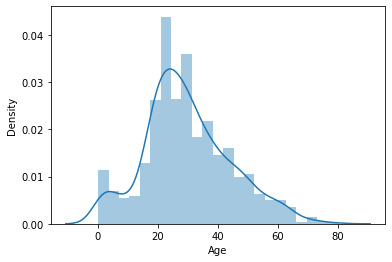

In [27]:
# if combine['Age']==None:
#     combine['Age_imp']==are
# elif combine['Age'] != None:
#     combine['Age_imp']==combine['Age']

# age_plot=sns.boxplot(x=combine.Age)
age_plot2=sns.distplot(combine.Age)

In [28]:
combine['Age']

train  0      22.0
       1      38.0
       2      26.0
       3      35.0
       4      35.0
              ... 
test   413     NaN
       414    39.0
       415    38.5
       416     NaN
       417     NaN
Name: Age, Length: 1309, dtype: float64

In [29]:
combine.head(20)

PassengerId  Survived  Pclass  \
train 0             1       0.0       3   
      1             2       1.0       1   
      2             3       1.0       3   
      3             4       1.0       1   
      4             5       0.0       3   
      5             6       0.0       3   
      6             7       0.0       1   
      7             8       0.0       3   
      8             9       1.0       3   
      9            10       1.0       2   
      10           11       1.0       3   
      11           12       1.0       1   
      12           13       0.0       3   
      13           14       0.0       3   
      14           15       0.0       3   
      15           16       1.0       2   
      16           17       0.0       3   
      17           18       1.0       2   
      18           19       0.0       3   
      19           20       1.0       3   

                                                       Name Sex   Age  SibSp  \
train 0                             Braund, Mr. Owen Harris   0  22.0      1   
      1   Cumings, Mrs. John Bradley (Florence Briggs Th...   1  38.0      1   
      2                              Heikkinen, Miss. Laina   1  26.0      0   
      3        Futrelle, Mrs. Jacques Heath (Lily May Peel)   1  35.0      1   
      4                            Allen, Mr. William Henry   0  35.0      0   
      5                                    Moran, Mr. James   0   NaN      0   
      6                             McCarthy, Mr. Timothy J   0  54.0      0   
      7                      Palsson, Master. Gosta Leonard   0   2.0      3   
      8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   1  27.0      0   
      9                 Nasser, Mrs. Nicholas (Adele Achem)   1  14.0      1   
      10                    Sandstrom, Miss. Marguerite Rut   1   4.0      1   
      11                           Bonnell, Miss. Elizabeth   1  58.0      0   
      12                     Saundercock, Mr. William Henry   0  20.0      0   
      13                        Andersson, Mr. Anders Johan   0  39.0      1   
      14               Vestrom, Miss. Hulda Amanda Adolfina   1  14.0      0   
      15                   Hewlett, Mrs. (Mary D Kingcome)    1  55.0      0   
      16                               Rice, Master. Eugene   0   2.0      4   
      17                       Williams, Mr. Charles Eugene   0   NaN      0   
      18  Vander Planke, Mrs. Julius (Emelia Maria Vande...   1  31.0      1   
      19                            Masselmani, Mrs. Fatima   1   NaN      0   

          Parch            Ticket     Fare Cabin Embarked    Title  \
train 0       0         A/5 21171   7.2500   NaN        S      Mr.   
      1       0          PC 17599  71.2833   C85        C     Mrs.   
      2       0  STON/O2. 3101282   7.9250   NaN        S    Miss.   
      3       0            113803  53.1000  C123        S     Mrs.   
      4       0            373450   8.0500   NaN        S      Mr.   
      5       0            330877   8.4583   NaN        Q      Mr.   
      6       0             17463  51.8625   E46        S      Mr.   
      7       1            349909  21.0750   NaN        S  Master.   
      8       2            347742  11.1333   NaN        S     Mrs.   
      9       0            237736  30.0708   NaN        C     Mrs.   
      10      1           PP 9549  16.7000    G6        S    Miss.   
      11      0            113783  26.5500  C103        S    Miss.   
      12      0         A/5. 2151   8.0500   NaN        S      Mr.   
      13      5            347082  31.2750   NaN        S      Mr.   
      14      0            350406   7.8542   NaN        S    Miss.   
      15      0            248706  16.0000   NaN        S     Mrs.   
      16      1            382652  29.1250   NaN        Q  Master.   
      17      0            244373  13.0000   NaN        S      Mr.   
      18      0            345763  18.0000   NaN        S     Mrs.   
      19      0          

In [30]:
combine['Age']=combine['Age'].fillna(combine['Age'].mean())

In [31]:
combine.head()

PassengerId  Survived  Pclass  \
train 0            1       0.0       3   
      1            2       1.0       1   
      2            3       1.0       3   
      3            4       1.0       1   
      4            5       0.0       3   

                                                      Name Sex   Age  SibSp  \
train 0                            Braund, Mr. Owen Harris   0  22.0      1   
      1  Cumings, Mrs. John Bradley (Florence Briggs Th...   1  38.0      1   
      2                             Heikkinen, Miss. Laina   1  26.0      0   
      3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   1  35.0      1   
      4                           Allen, Mr. William Henry   0  35.0      0   

         Parch            Ticket     Fare Cabin Embarked  Title       Age_bin  \
train 0      0         A/5 21171   7.2500   NaN        S    Mr.  (20.0, 30.0]   
      1      0          PC 17599  71.2833   C85        C   Mrs.  (30.0, 40.0]   
      2      0  STON/O2. 3101282   7.9250   NaN        S  Miss.  (20.0, 30.0]   
      3      0            113803  53.1000  C123        S   Mrs.  (30.0, 40.0]   
      4      0            373450   8.0500   NaN        S    Mr.  (30.0, 40.0]   

            Fare_bin Title_extr  
train 0  (5.0, 10.0]        Mr.  
      1  (35.0, inf]       Mrs.  
      2  (5.0, 10.0]      Miss.  
      3  (35.0, inf]       Mrs.  
      4  (5.0, 10.0]        Mr.

In [32]:
combine['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [33]:
combine['Embarked2']=combine['Embarked'].map({'S':1,'C':2,'Q':3})
combine[['PassengerId','Embarked','Embarked2']].groupby(['Embarked','Embarked2']).PassengerId.count().sort_values(ascending=False)
# combine[['Embarked','Embarked2']].value_counts()

Embarked  Embarked2
S         1.0          914
C         2.0          270
Q         3.0          123
Name: PassengerId, dtype: int64

In [34]:
combine['Age'].value_counts()

29.881138    263
24.000000     47
22.000000     43
21.000000     41
30.000000     40
            ... 
23.500000      1
20.500000      1
55.500000      1
66.000000      1
38.500000      1
Name: Age, Length: 99, dtype: int64

In [35]:
int(combine['Age'].mean())

29

In [36]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1309 entries, ('train', 0) to ('test', 417)
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    float64 
 2   Pclass       1309 non-null   int64   
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   object  
 5   Age          1309 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1308 non-null   float64 
 10  Cabin        295 non-null    object  
 11  Embarked     1307 non-null   object  
 12  Title        891 non-null    object  
 13  Age_bin      1046 non-null   category
 14  Fare_bin     891 non-null    category
 15  Title_extr   1309 non-null   object  
 16  Embarked2    1307 non-null   float64 
dtypes: category(2), float64(4), int64(4), object(7)
mem

In [37]:
combine['Age']=combine['Age'].fillna(combine['Age'].mean())



In [38]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1309 entries, ('train', 0) to ('test', 417)
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    float64 
 2   Pclass       1309 non-null   int64   
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   object  
 5   Age          1309 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1308 non-null   float64 
 10  Cabin        295 non-null    object  
 11  Embarked     1307 non-null   object  
 12  Title        891 non-null    object  
 13  Age_bin      1046 non-null   category
 14  Fare_bin     891 non-null    category
 15  Title_extr   1309 non-null   object  
 16  Embarked2    1307 non-null   float64 
dtypes: category(2), float64(4), int64(4), object(7)
mem

In [51]:
combine.isnull()

AttributeError: 'DataFrame' object has no attribute 'group'

In [59]:
combine=pd.concat([train_df,test_df])
combine

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_bin,Fare_bin
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,"(19.0, 25.0]","(5.0, 10.0]"
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,"(31.8, 41.0]","(35.0, inf]"
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,"(25.0, 31.8]","(5.0, 10.0]"
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs.,"(31.8, 41.0]","(35.0, inf]"
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr.,"(31.8, 41.0]","(5.0, 10.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN,NaN,NaN
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN,NaN,NaN
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN,NaN,NaN
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN,NaN,NaN


In [98]:
combine=pd.concat([train_df,test_df])
combine.loc[combine['Fare']<=7.91, 'Fare2']=0
combine.loc[(combine['Fare']>7.91) & (combine['Fare']<=15), 'Fare2']=1
combine.loc[(combine['Fare']>15) & (combine['Fare']<=25), 'Fare2']=2
combine.loc[(combine['Fare']>25) & (combine['Fare']<=50), 'Fare2']=3
combine.loc[combine['Fare']>50, 'Fare2']=4

combine.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_bin,Fare_bin,Fare2
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,"(19.0, 25.0]","(5.0, 10.0]",0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,"(31.8, 41.0]","(35.0, inf]",4.0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,"(25.0, 31.8]","(5.0, 10.0]",1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs.,"(31.8, 41.0]","(35.0, inf]",4.0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr.,"(31.8, 41.0]","(5.0, 10.0]",1.0
5,6,0.0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q,Mr.,NaN,"(5.0, 10.0]",1.0
6,7,0.0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,Mr.,"(41.0, 80.0]","(35.0, inf]",4.0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,Master.,"(0.419, 19.0]","(20.0, 25.0]",2.0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,Mrs.,"(25.0, 31.8]","(10.0, 15.0]",1.0
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C,Mrs.,"(0.419, 19.0]","(30.0, 35.0]",3.0


In [74]:
combine.Fare.fillna(combine['Fare'].mean()).astype(int)

0      0
1      4
2      1
3      4
4      1
      ..
413    1
414    4
415    0
416    1
417    2
Name: Fare, Length: 1309, dtype: int32

In [82]:
combine.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,1.783639
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,1.471424
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,1.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,3.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,4.000000


In [96]:
combine.loc[combine['Fare']<=1,'Fare4']=0
combine[combine['Fare2'] != 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_bin,Fare_bin,Fare2,Fare3,Fare4
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
combine['']